In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
import re
import string 
import openai

ModuleNotFoundError: No module named 'openai'

In [2]:
# Set max row and column display
pd.options.display.max_rows=None
pd.options.display.max_columns=None

In [3]:
# Set paths to Real and Fake article CSV files
file_fake = "Resources/fake_articles.csv"
file_real = "Resources/real_articles.csv"

In [4]:
# Read the Real and Fake article CSV files CSV files into DataFrames
df_fake_articles = pd.read_csv(file_fake)
df_real_articles = pd.read_csv(file_real)

In [5]:
# Print first 5 rows of df_fake_articles dataframe
df_fake_articles.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
# Display shape of df_fake_articles dataframe
print(f'Shape of df_fake_articles: {df_fake_articles.shape}')

Shape of df_fake_articles: (23481, 4)


In [7]:
# Print first 5 rows of df_real_articles dataframe
df_real_articles.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17


In [8]:
# Display shape of df_real_articles dataframe
print(f'Shape of df_real_articles: {df_real_articles.shape}')

Shape of df_real_articles: (21417, 4)


In [9]:
# Display the dataframe information
df_fake_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [10]:
# Display the df_fake_articles subject column values
df_fake_articles['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [11]:
# Convert df_fake_articles date column from object to datetime
df_fake_articles['date'] = pd.to_datetime(df_fake_articles['date'],errors='coerce')

In [12]:
# Display first 5 rows of the df_fake_articles dataframe information after datetime conversion
df_fake_articles.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25


In [13]:
# Display the df_fake_articles dataframe information after datetime conversion to confirm there are no nulls
df_fake_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    23481 non-null  object        
 1   text     23481 non-null  object        
 2   subject  23481 non-null  object        
 3   date     11868 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 733.9+ KB


In [14]:
# The df_fake_articles date column contained a lot of bad dates that were converted to nulls,
# only 11868 of 23481 rows contain dates. We will review some of the rows with null dates to
# see if the articles seem valid.
df_fake_null_date_rows = df_fake_articles.loc[df_fake_articles['date'].isnull()]
print(df_fake_null_date_rows.head())

                                                  title  \
9050  Democrat Senator Warns Mueller Not To Release ...   
9051  MSNBC ANCHOR Flabbergasted at What Texas Teach...   
9052  WATCH: SNOWFLAKES ASKED Communist Party Platfo...   
9053  JUST IN: BADASS GENERAL JOHN KELLY Shoved Chin...   
9054  DOJ’s JEFF SESSIONS Opens Investigation Into W...   

                                                   text   subject date  
9050  According to The Hill, Democrat Senator Bob Ca...  politics  NaT  
9051  If we protect every other government building ...  politics  NaT  
9052  Ami Horowitz is fantastic! Check out this man ...  politics  NaT  
9053  Just one more reminder of why President Trump ...  politics  NaT  
9054  Thank goodnesss Jeff Sessions is moving on fin...  politics  NaT  


In [15]:
# The df_fake_articles columns for the rows with a null date look good.  Our analysis is not be based on
#  the date, so we will drop the date column from our dataframe and continue with our analysis.
df_fake_articles_revised = df_fake_articles.drop('date', axis=1)
print(df_fake_articles_revised.head())
print(df_fake_articles_revised.info())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  
0  Donald Trump just couldn t wish all Americans ...    News  
1  House Intelligence Committee Chairman Devin Nu...    News  
2  On Friday, it was revealed that former Milwauk...    News  
3  On Christmas day, Donald Trump announced that ...    News  
4  Pope Francis used his annual Christmas Day mes...    News  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null 

In [16]:
# Display the dataframe information
df_real_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [17]:
# Display the df_real_articles subject column values
df_real_articles['subject'].unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [18]:
# Convert df_real_articles date column from object to datetime
df_real_articles['date'] = pd.to_datetime(df_real_articles['date'],errors='coerce')

C:\Users\GDCHE\AppData\Local\Temp\ipykernel_31056\2896937733.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_real_articles['date'] = pd.to_datetime(df_real_articles['date'],errors='coerce')


In [19]:
# Print first 5 rows of updated df_real_articles dataframe after date conversion
df_real_articles.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29


In [20]:
# Display the df_real_articles dataframe information after datetime conversion to confirm there are no nulls
df_real_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    21417 non-null  object        
 1   text     21417 non-null  object        
 2   subject  21417 non-null  object        
 3   date     21417 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 669.4+ KB


In [21]:
# All df_real_articles dates converted successfully.  Our analysis is not be based on the date,
# so we will drop the date column from our dataframe to be consistent with the df_real_articles
# dataframe and continue with our analysis.
df_real_articles_revised = df_real_articles.drop('date', axis=1)
print(df_real_articles_revised.head())
print(df_real_articles_revised.info())

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews  
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews  
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews  
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews  
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  

In [22]:
# Add a new column "class" to each DataFrame and set values for Real and Fake articles
# class:  Fake = 0;  Real = 1
df_fake_articles_revised['class'] = 0
df_real_articles_revised['class'] = 1


In [23]:
# Print the first 5 rows and info of df_fake_articles_revised dataframe to verify the changes
print("df_fake_articles_revised dataframe:")
print(df_fake_articles_revised.head())
print('\n')
print("df_fake_articles_revised info:")
print(df_fake_articles_revised.info())

df_fake_articles_revised dataframe:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  class  
0  Donald Trump just couldn t wish all Americans ...    News      0  
1  House Intelligence Committee Chairman Devin Nu...    News      0  
2  On Friday, it was revealed that former Milwauk...    News      0  
3  On Christmas day, Donald Trump announced that ...    News      0  
4  Pope Francis used his annual Christmas Day mes...    News      0  


df_fake_articles_revised info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   -------------- 

In [24]:
# Print the first 5 rows and shape of df_real_articles_revised dataframe to verify the changes
print("df_real_articles_revised dataframe:")
print(df_real_articles_revised.head())
print('\n')
print("df_real_articles_revised info:")
print(df_real_articles_revised.info())

df_real_articles_revised dataframe:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  class  
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews      1  
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews      1  
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews      1  
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews      1  
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews      1  


df_real_articles_revised info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  

In [25]:
# Concatenate df_fake_articles and df_real_articles dataframes into new df_merged_articles dataframe
df_merged_articles = pd.concat([df_fake_articles_revised, df_real_articles_revised], ignore_index=True)

# Display first and last 5 rows of df_merged_articles dataframe
print(df_merged_articles.head(5))
print(df_merged_articles.tail(5))

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  class  
0  Donald Trump just couldn t wish all Americans ...    News      0  
1  House Intelligence Committee Chairman Devin Nu...    News      0  
2  On Friday, it was revealed that former Milwauk...    News      0  
3  On Christmas day, Donald Trump announced that ...    News      0  
4  Pope Francis used his annual Christmas Day mes...    News      0  
                                                   title  \
44893  'Fully committed' NATO backs new U.S. approach...   
44894  LexisNexis withdrew two products from Chinese ...   
44895  Minsk cultural hub becomes haven from authorities   
448

In [26]:
#dup_title = df_merged_articles['title'].duplicated()
#dup_title.value_counts()

In [27]:
#dup_text = df_merged_articles['text'].duplicated()
#dup_text.value_counts()

In [28]:
# Sort by title to scramble the real and fake articles
#df_merged_articles_sorted = df_merged_articles.sort_values(by=['title'], inplace=True)

# Display first and last 5 rows of df_merged_articles_sorted dataframe
#print(df_merged_articles_sorted.head(5))
#print(df_merged_articles_sorted.tail(5))

In [29]:
# Concatenate df_fake_articles and df_real_articles dataframes into new df_merged_articles dataframe
#df_merged_articles = pd.concat([df_fake_articles_revised, df_real_articles_revised], ignore_index=True)
# Display first and last 5 rows of df_merged_articles dataframe
#print(df_merged_articles.head(5))
#print(df_merged_articles.tail(5))

#print('df_merged_articles info after concatenation:')
#print('\n')
#print(df_merged_articles.info())

# Sort by title to scramble the real and fake articles
#df_merged_articles.sort_values('title', inplace=True)

# Drop all duplicates, keeping the last occurrence
#df_merged_articles.drop_duplicates(keep='last', inplace=True)
#print('df_merged_articles info after duplicates dropped:')
#print('\n')
#print(df_merged_articles.info())

# Reset index just in case any duplicate rows were dropped
#df_merged_articles.reset_index(drop=True, inplace=True)

# Display first and last 5 rows of df_merged_articles dataframe
#print(df_merged_articles.head(5))
#print(df_merged_articles.tail(5))

In [30]:
df_merged_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   class    44898 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [31]:
# Verifying "class" column after concatenation
class_column = df_merged_articles['class']

# Printing the 'Class' column
print(class_column)

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46       0
47       0
48       0
49       0
50       0
51       0
52       0
53       0
54       0
55       0
56       0
57       0
58       0
59       0
60       0
61       0
62       0
63       0
64       0
65       0
66       0
67       0
68       0
69       0
70       0
71       0
72       0
73       0
74       0
75       0
76       0
77       0
78       0
79       0
80       0
81       0
82       0
83       0
84       0
85       0
86       0
87       0
88       0
89       0
90       0

In [32]:
# Printing the unique values in the 'Class' column
print(class_column.unique())

[0 1]


In [33]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [34]:
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Initialize the WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join the words back into a single string
    cleaned_text = ' '.join(words)
    
    return cleaned_text

In [35]:
# Example 
dirty_text = "This is an example sentence with some numbers like 123, and special characters !@#$, as well as URLs https://www.example.com"
cleaned_text = clean_text(dirty_text)
print(cleaned_text)

example sentence number like special character well url


In [36]:
df_merged_articles['cleaned_text'] = df_merged_articles['text'].apply(clean_text)
df_merged_articles.head()

,title,text,subject,class,cleaned_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0,donald trump wish american happy new year leav...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0,house intelligence committee chairman devin nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0,friday revealed former milwaukee sheriff david...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0,christmas day donald trump announced would bac...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0,pope francis used annual christmas day message...


In [37]:
# Splitting Data

X = df_merged_articles['cleaned_text']
y = df_merged_articles['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [38]:
#print(len(X_train))
#print(len(X_test))
#print(len(y_train))
#print(len(y_test))

In [39]:
# Assuming you have your data ready, e.g., X_train, X_test, y_train, y_test
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize the Passive Aggressive Classifier
pac = PassiveAggressiveClassifier(max_iter=50)

# Train the model
pac.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = pac.predict(X_test_tfidf)
y_pred_train = pac.predict(X_train_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

accuracy_2 = accuracy_score(y_train, y_pred_train)
print(f"Accuracy: {accuracy_2}")

Accuracy: 0.9945805493689681
Accuracy: 0.9999681812396589


In [40]:
# Evaluate on training set
y_train_pred = pac.predict(X_train_tfidf)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate on test set
y_test_pred = pac.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.9999681812396589
Test Accuracy: 0.9945805493689681


In [41]:
# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7091
           1       0.99      1.00      0.99      6379

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [42]:
# WORDCLOUD -- Start with loading all necessary libraries
#import numpy as np
#import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

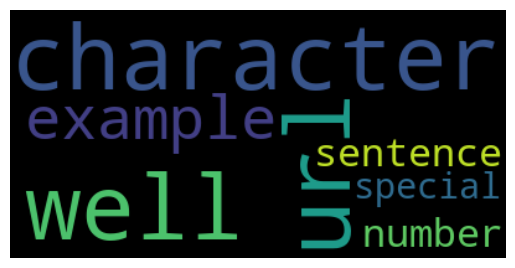

In [43]:
# Start with one review:
#text = df.description[0]
test_string = 'example sentence number like special character well url character well url character well url'
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(test_string)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [44]:
# Concatenate X_train and y_train back together to separate articles into real and fake dataframes to 
# use in WordCloud
df_articles_wc = pd.concat([X_train, y_train], axis='columns', ignore_index=True)

# Display first and last 5 rows of df_merged_articles dataframe
print(df_articles_wc.head(5))
print(df_articles_wc.tail(5))

                                                       0  1
13970  news horrific enough deputy national security ...  0
41668  geneva reuters head nobel peace prize winning ...  1
26810  seattle reuters hawaii become first u state en...  1
30967  new york reuters online trading platform predi...  1
26072  boston reuters massachusetts police authority ...  1
                                                       0  1
11284                                                     0
44732  londontokyo reuters british prime minister the...  1
38158  berlin reuters chancellor angela merkel said g...  1
860    jesus fcking christ president moron satisfied ...  0
15795  toast bigger trouble thought much whole thing ...  0


In [45]:
df_real_articles_wc = df_articles_wc.loc[df_articles_wc[1] == 1]
print(df_real_articles_wc.head())

                                                       0  1
41668  geneva reuters head nobel peace prize winning ...  1
26810  seattle reuters hawaii become first u state en...  1
30967  new york reuters online trading platform predi...  1
26072  boston reuters massachusetts police authority ...  1
41384  ankara reuters turkey military operation syria...  1


In [46]:
df_fake_articles_wc = df_articles_wc.loc[df_articles_wc[1] == 0]
print(df_fake_articles_wc.head())

                                                       0  1
13970  news horrific enough deputy national security ...  0
7209   republican handed harsh reminder country judic...  0
8575   donald trump heavilyconservative base filled b...  0
19908  new york man stunned week find stole donald tr...  0
1494   president donald trump may known catchphrase f...  0


In [ ]:
#df_real_articles_wc[0]

In [47]:
test_string_real = [''.join(word) for word in df_real_articles_wc[0]]
test_string_real

['geneva reuters head nobel peace prize winning international campaign abolish nuclear weapon said friday u president donald trump north korean leader kim jong un know nuclear weapon illegal asked message two leader ican executive director beatrice fihn told reuters nuclear weapon illegal threatening use nuclear weapon illegal nuclear weapon possessing nuclear weapon developing nuclear weapon illegal need stop',
 'seattle reuters hawaii become first u state enact legislation bring environmental standard line paris climate accord official said wednesday le week president donald trump announced united state would withdraw global agreement hawaii governor david ige signed bill tuesday requiring state official plan response climate change aligns state standard goal paris pact according scott glenn environmental adviser governor people come hawaii enjoy environment glenn said climate change threatening reef threatening weather threatening economy although hawaii already strong environmental

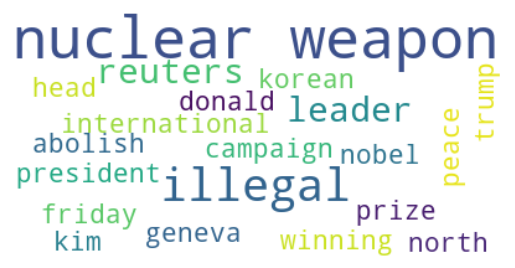

In [57]:
# Set WordCloud stopwords
stopwords_wc_real = set(STOPWORDS)

# To add additonal stopwords, if needed
new_words_real = ['u', 'two', 'said', 'know']
new_stopwords_real = stopwords_wc.union(new_words)

# Create and generate a word cloud image:
#wordcloud = WordCloud().generate(test_string_real[0])
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color='white', stopwords=new_stopwords, colormap='viridis').generate(test_string_real[0])

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Create word list from fake articles column
test_string_fake = [''.join(word) for word in df_fake_articles_wc[0]]

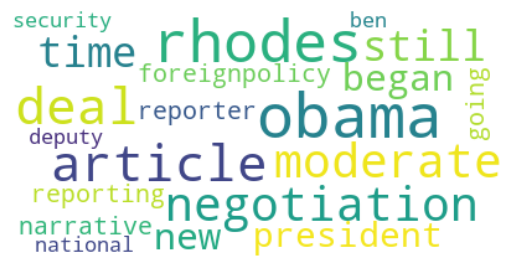

In [56]:
# Set WordCloud stopwords
stopwords_wc = set(STOPWORDS)

# To add additonal stopwords, if needed
new_words = ['u','say', 'know', 'said']
new_stopwords = stopwords_wc.union(new_words)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color='white', stopwords=new_stopwords, colormap='viridis').generate(test_string_fake[0])

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Create and generate a word cloud image:
#wordcloud = WordCloud(background_color='white',stopwords=stopwords).generate(' '.join(df_fake_articles_wc[0]))
wordcloud = WordCloud(background_color='white',stopwords=stopwords).generate(' '.join(df_fake_articles_wc[0]))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()